## Step0: E-Commerce 영역과 플랫폼 서비스의 데이터

### E-Commerce & Platform Business 란?

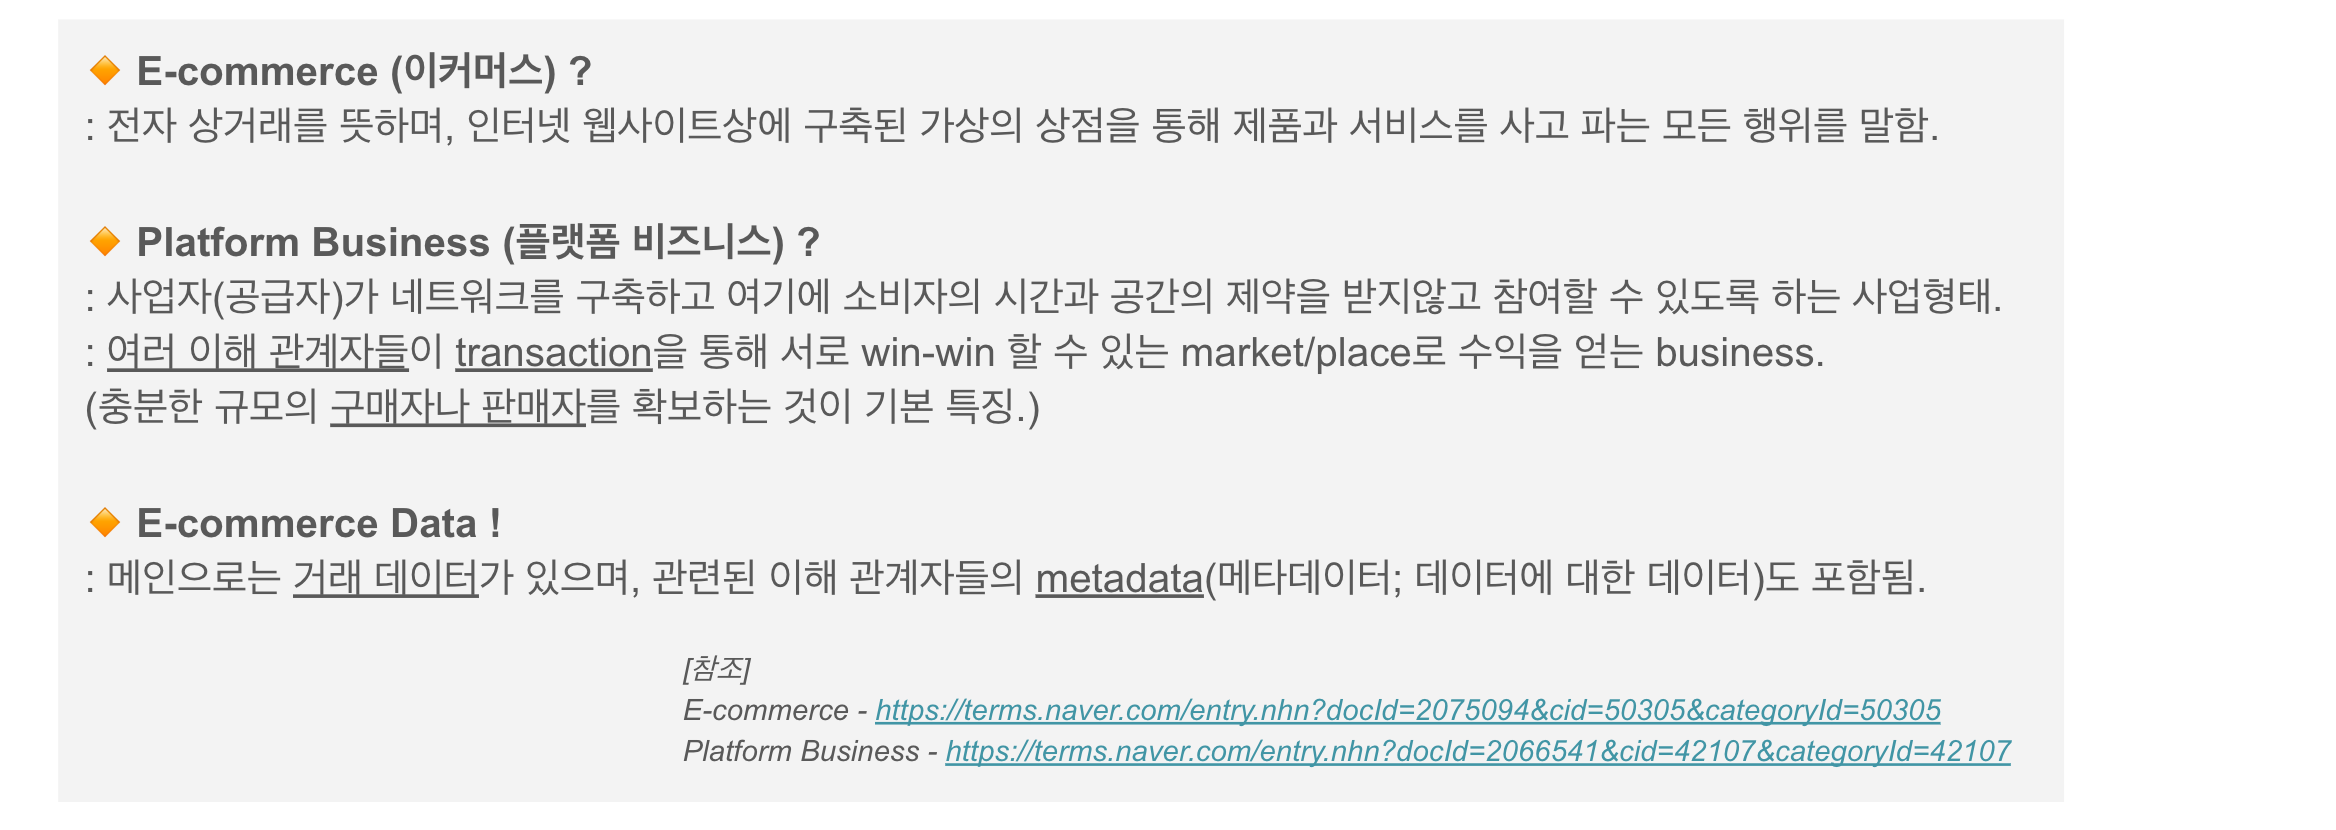

### E-Commerce data의 형태

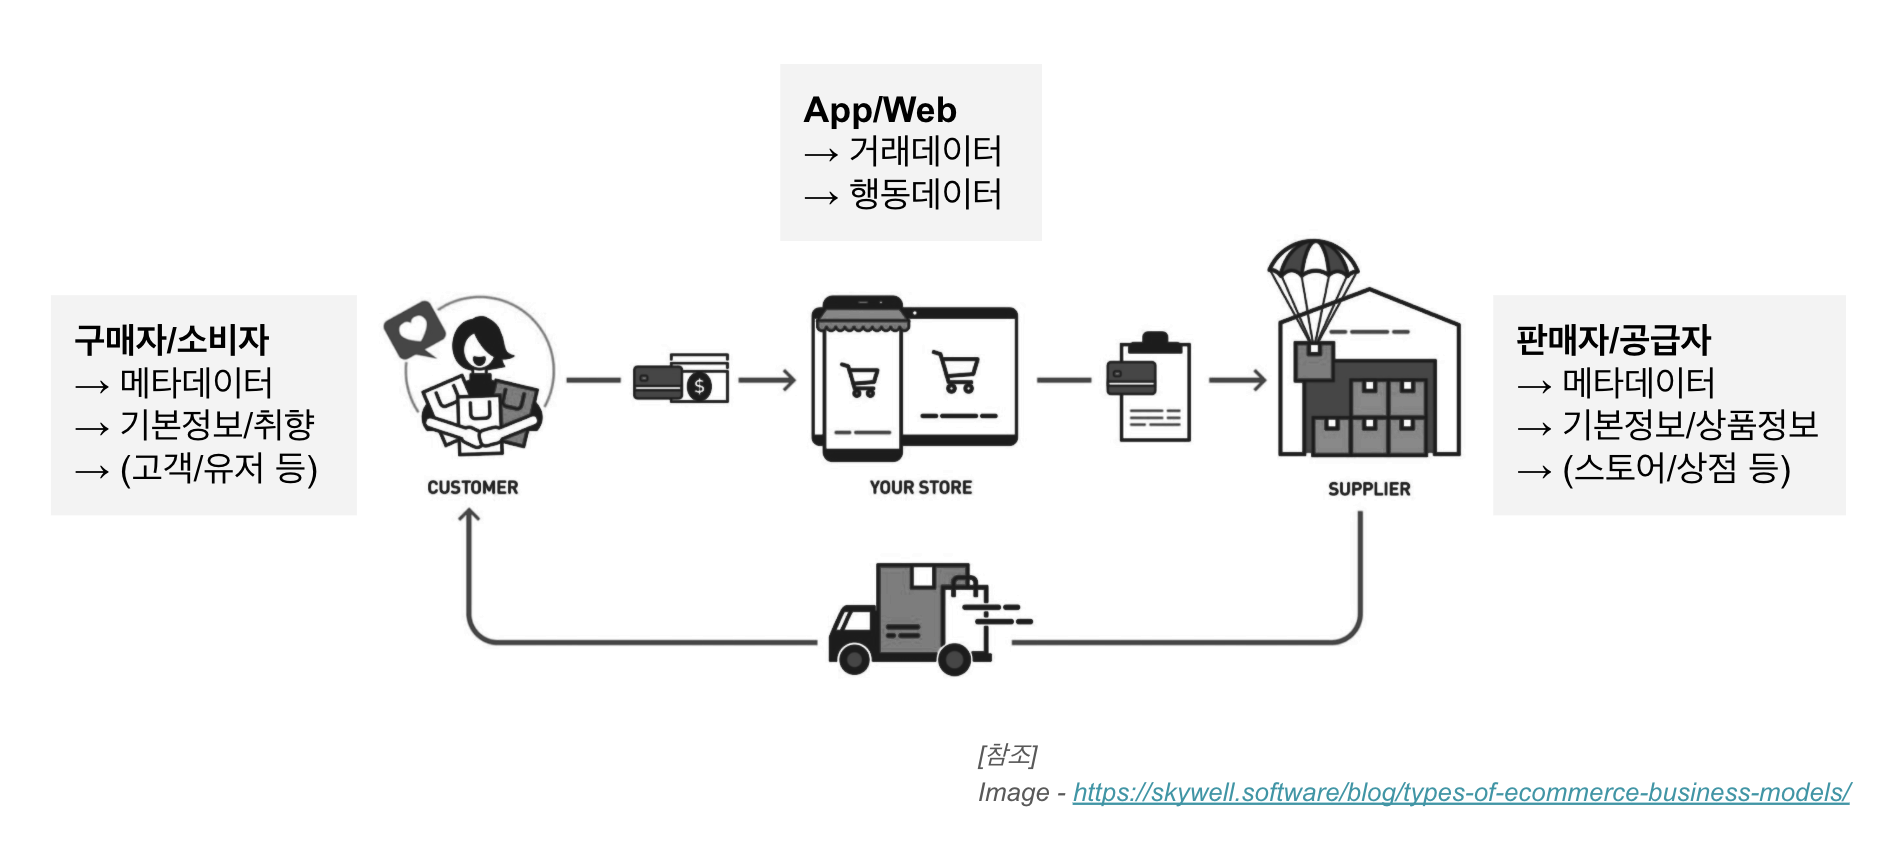

## Step1: E-Commerce 고객(수요) 데이터 불러오기 & 전처리

### 문제 1. E-Commerce 데이터 다운로드 (users)
: 주어진 url을 사용해서 E-Commerce 데이터를 다운로드 받아보세요.

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)

In [ ]:
# 데이터 url.
user_metadata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_meta_data.csv"
user_statsdata_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_data.csv"

# 위의 url를 사용해서 각각의 DataFrame을 생성해보세요.
user_metadata_df = pd.read_csv(user_metadata_url, parse_dates=[0])
user_stats_df = pd.read_csv(user_statsdata_url, parse_dates=[0])


In [ ]:
# load된 데이터의 형태(shape)을 확인해보세요.
user_metadata_df.shape, user_stats_df.shape, 

((3412, 10), (3412, 11))

In [ ]:
user_metadata_df.head()

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1
2,5UD76uKfYNPTliG,1,1999,300,4,2018-12-18,NaT,NaN,AOS,6
3,lfpxRIsbmmt6mUQ,0,1998,300,7,2019-01-16,NaT,NaN,AOS,2
4,djGLdEHvJy17TDX,1,1999,300,6,2019-11-06,NaT,NaN,AOS,2


In [ ]:
user_stats_df.head()

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.000,1.00,23800.00,0.00,2020-04-05
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.000,1.00,23000.00,10000.00,2020-01-17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.000,1.00,24000.00,24000.00,2020-05-15
3,EoRzAGlei59fugN,100,1.0,22000.0,-5000.0,0.0,1.000,1.00,22000.00,14000.00,2020-03-02
4,zgQJlOYlFURl6ev,300,19.0,561200.0,0.0,0.0,2.375,4.75,29536.84,24615.79,2020-06-23


### 문제 2. E-Commerce 고객 메타데이터 둘러보기 (metadata)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 메타 데이터를 파악해보세요.

#### [User metadata 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
sex | 성별 (0:남, 1:여)
birthday_year | 생일년도 (yyyy)
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
category_prefer | 카테고리 선호 입력수 (int)
joined_date | 가입일자 (yyyy-mm-dd)
deleted_date | 탈퇴일자 (yyyy-mm-dd)
join_path | 가입경로 (None:일반가입,1:sns가입)
os | os 타입 (IOS, AOS)
recommended_cnt | 친구추천 수 (int)



In [ ]:
# 컬럼의 데이터 타입을 확인해보세요.
user_metadata_df.dtypes

user_id             object
sex                  int64
birthday_year        int64
membership_type      int64
category_prefer      int64
joined_date         object
deleted_date        object
join_path          float64
os                  object
recommended_cnt      int64
dtype: object

### 문제 3. E-Commerce 고객 메타데이터 전처리하기 (metadata)
: E-Commerce 고객 메타 데이터를 분석에 필요한 컬럼을 생성해보세요.

In [ ]:
# 생일년도를 사용해서 2021년 기준 고객의 나이정보를 생성해보세요.
this_year = 2021
user_metadata_df["age"] = this_year - user_metadata_df["birthday_year"] + 1
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27


In [ ]:
# 가입일자를 사용해서 2021년 1월 1일 기준 고객의 가입기간을 생성해보세요.
today_ymd = datetime(2021,1,1)

# 가입일자의 포멧을 날짜형식('datetime64[ns]')으로 변경해보세요.
user_metadata_df["joined_date"] = user_metadata_df["joined_date"].astype('datetime64[ns]')
# 가입기간을 일(day)로 계산해보세요.
user_metadata_df["days_from_joined"] = (today_ymd - user_metadata_df["joined_date"]).dt.days
# 가입기간을 년도(year)로 계산해보세요. 
# [참고] np.timedelta64(1, "Y") 를 사용해보세요.
user_metadata_df["years_from_joined"] = (today_ymd - user_metadata_df["joined_date"])/np.timedelta64(1, "Y")
user_metadata_df["years_from_joined"] = user_metadata_df["years_from_joined"].round(1)
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7


In [ ]:
# 탈퇴일자를 사용해서 2021년 1월 1일 기준 고객의 탈퇴여부를 binary로 나타내보세요.
# [참고] 탈퇴일자는 string 컬럼입니다. 
# user_metadata_df[user_metadata_df["deleted_date"]=="NaT"]
# 1: 탈퇴함, 0: 탈퇴하지 않음
user_metadata_df["if_deleted"] = np.where(user_metadata_df["deleted_date"]=="NaT", 0, 1) 
user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,NaN,AOS,4,27,480,1.3,0
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,NaN,AOS,1,27,263,0.7,0


### 문제 4. E-Commerce 고객 거래데이터 둘러보기 (transaction data)
: 데이터별 컬럼 명세서를 통해 E-Commerce 고객 거래 데이터를 파악해보세요.

#### [User stat 컬럼 명세서]  

컬럼명 | 설명
--- | ---
user_id | 고객 고유 ID
membership_type | 멤버십 타입 (100:비회원, 300-500:정회원)
total_order_cnt | 총 거래건수
total_cost | 총 거래금액
avg_coupon_amt | 평균 쿠폰사용 금액
avg_point_amt | 평균 포인트사용 금액
weekly_order_cnt | 주평균 거래건수
monthly_order_cnt | 주평균 거래건수
avg_cost | 평균 거래금액
avg_item_cost | 평균 상품금액
last_date | 마지막 거래일자 (yyyy-mm-dd)



In [ ]:
# 아래 코드로 컬럼의 데이터 타입을 확인해보세요.
user_stats_df.dtypes

user_id               object
membership_type        int64
total_order_cnt      float64
total_cost           float64
avg_coupon_amt       float64
avg_point_amt        float64
weekly_order_cnt     float64
monthly_order_cnt    float64
avg_cost             float64
avg_item_cost        float64
last_date             object
dtype: object

### 문제 5. E-Commerce 고객 거래데이터 전처리하기 (transaction data)

In [ ]:
# 마지막 거래일자의 범위를 확인해 보세요.
user_stats_df.last_date.min(), user_stats_df.last_date.max()

('2020-01-01', '2020-06-30')

In [ ]:
# 마지막 거래일자의 가장 오래된 날짜를 선택하여, Recency의 정도를 알아보는 컬럼을 생성해보세요.
# [참고] 기준점이 마지막 거래일자 직전일이 됩니다. (0일이 생기지 않게 하기위해)
oldest_ymd = datetime(2019,12,31)

# 날짜컬럼으로 변경하고 Recency 컬럼을 생성해보세요. ('datetime64[ns]')
# 뒤에서 진행할 분석법에서 숫자가 클수록 높은 점수를 부여하기 위해 과거 시간을 기준으로 일수를 역산합니다.
user_stats_df["last_date"] = user_stats_df["last_date"].astype('datetime64[ns]')
user_stats_df["days_of_recency"] = (user_stats_df["last_date"] - oldest_ymd).dt.days


## Step2: Clustering - 고객(수요) 메타데이터를 이용한 군집화



### 문제 6. EDA : 고객(메타데이터) - 1차원에서 살펴보기
: 분류가 되어 있지 않은 데이터이므로, 사전 EDA를 통해 얻게되는 정보가 나중에 군집분석 결과를 해석/이해하는데 도움이 될때가 많습니다.  

```
[TIP] EDA에 사용되는 변수를 기준으로 1차원, 2차원 등 순서대로 EDA를 진행합니다.
```


In [ ]:
# 컬럼별 null값 살펴보세요.
print(user_metadata_df.isnull().sum(axis = 0))
# null값을 채워주세요.
user_metadata_df["join_path"] = user_metadata_df["join_path"].fillna(0)

user_id                 0
sex                     0
birthday_year           0
membership_type         0
category_prefer         0
joined_date             0
deleted_date            0
join_path            2888
os                      0
recommended_cnt         0
age                     0
days_from_joined        0
years_from_joined       0
if_deleted              0
dtype: int64


In [ ]:
# 고객 메타데이터 이므로 user_id 기준으로 unique 해야합니다. user_id 기준으로 중복 데이터를 확인해보세요.
user_metadata_df[user_metadata_df.duplicated(["user_id"])]
# 중복 데이터가 있다면 삭제해주세요.
# user_metadata_df.drop_duplicates(subset="user_id")


,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted


In [ ]:
# membership_type별 고객 분포를 파악해보세요.
user_metadata_df.groupby(["membership_type"])[["user_id"]].count().reset_index()

,membership_type,user_id
0,100,2667
1,300,513
2,400,126
3,500,106


In [ ]:
# 가입기간(years_from_joined)에 따른 고객 분포를 확인해보세요.
user_cnt_from_joined_df = user_metadata_df.groupby(["years_from_joined"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_from_joined_df, x="years_from_joined", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 카테고리 선호 입력수(category_prefer)에 따른 고객 분포를 확인해보세요.
user_cnt_by_ctg_df = user_metadata_df.groupby(["category_prefer"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_ctg_df, x="category_prefer", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

In [ ]:
# 친구추천 횟수(recommended_cnt)에 따른 고객 분포를 확인해보세요.
user_cnt_by_recomm_df = user_metadata_df.groupby(["recommended_cnt"])[["user_id"]].count().reset_index()
fig = px.bar(user_cnt_by_recomm_df, x="recommended_cnt", y="user_id")
fig.update_layout(height=500, width=1000)
fig.show()

### 문제 7. EDA : 고객(메타데이터) - 2차원에서 살펴보기

In [ ]:
# 변수간 상관계수를 살펴보세요.
corr_matrix = user_metadata_df.corr()
corr_matrix 

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [ ]:
# 유효한 정보만 확인하는 방법입니다.
# [참고] 상관계수중에 상대적/비교적으로 높은 관계를 찾아보세요.
corr_matrix[abs(corr_matrix)>=0.2]

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birthday_year,NaN,1.000000,NaN,0.504292,NaN,0.25895,-1.000000,NaN,NaN,NaN
membership_type,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_prefer,NaN,0.504292,NaN,1.000000,NaN,NaN,-0.504292,NaN,NaN,NaN
join_path,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
recommended_cnt,NaN,0.258950,NaN,NaN,NaN,1.00000,-0.258950,NaN,NaN,NaN
age,NaN,-1.000000,NaN,-0.504292,NaN,-0.25895,1.000000,NaN,NaN,NaN
days_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.999718,NaN
years_from_joined,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999718,1.000000,NaN
if_deleted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# 상관계수를 heatmap으로 나타내보세요.
corr_matrix.style.background_gradient()


,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
sex,1.000000,-0.005282,0.001593,-0.006267,-0.017552,-0.013729,0.005282,-0.016833,-0.016351,0.001651
birthday_year,-0.005282,1.000000,-0.069491,0.504292,0.009461,0.258950,-1.000000,-0.138338,-0.138318,0.021408
membership_type,0.001593,-0.069491,1.000000,-0.053046,0.019963,-0.021604,0.069491,0.037165,0.036992,0.009109
category_prefer,-0.006267,0.504292,-0.053046,1.000000,0.002226,0.171625,-0.504292,-0.007478,-0.007576,0.013642
join_path,-0.017552,0.009461,0.019963,0.002226,1.000000,0.006406,-0.009461,-0.064171,-0.063883,-0.020725
recommended_cnt,-0.013729,0.258950,-0.021604,0.171625,0.006406,1.000000,-0.258950,0.186742,0.187304,0.009055
age,0.005282,-1.000000,0.069491,-0.504292,-0.009461,-0.258950,1.000000,0.138338,0.138318,-0.021408
days_from_joined,-0.016833,-0.138338,0.037165,-0.007478,-0.064171,0.186742,0.138338,1.000000,0.999718,-0.010898
years_from_joined,-0.016351,-0.138318,0.036992,-0.007576,-0.063883,0.187304,0.138318,0.999718,1.000000,-0.011358
if_deleted,0.001651,0.021408,0.009109,0.013642,-0.020725,0.009055,-0.021408,-0.010898,-0.011358,1.000000


In [ ]:
# age & category_prefer 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["category_prefer"])
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# age & recommended_cnt 관계를 나타내는 scatter plot을 그려보세요.
fig = px.scatter(x=user_metadata_df["age"], y=user_metadata_df["recommended_cnt"])
fig.update_layout(width=600, height=500)
fig.show()

In [ ]:
# sex & join_path (pivot_table() 사용.)
user_metadata_df.pivot_table(values="user_id", index="sex", columns="join_path", aggfunc='count')


join_path,0.0,1.0
sex,,
0,1253,240
1,1635,284


### 문제 8. Clustering : 고객(메타데이터) - 고객 메타데이터 정제 및 데이터셋 분리.

In [ ]:
# 고객 메타데이터에서 군집분석을 위한 변수만 남겨보세요.
# [참고] 아래 리스트(numerics_types)를 사용하여 숫자 형태의 변수만 남겨보세요.
numerics_types = ["int16", "int32", "int64", "float16", "float32", "float64"]
user_numerics_df = user_metadata_df.select_dtypes(include=numerics_types)
user_numerics_df.head(2)

,sex,birthday_year,membership_type,category_prefer,join_path,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted
0,0,1995,300,3,0.0,4,27,480,1.3,0
1,1,1995,300,2,0.0,1,27,263,0.7,0


In [ ]:
# 군집화에서 binary변수와 일반 숫자변수를 혼용해서 훈련시키는 것을 지양합니다.
# binary변수를 제거하세요.
# [참고] np.isin()을 활용해보세요.
user_numerics_cols = [col for col in user_numerics_df if np.isin(user_numerics_df[col].unique(), [0, 1]).all()]
user_numerics_df = user_numerics_df.drop(user_numerics_cols, axis=1)
user_numerics_df.head(2)

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1995,300,3,4,27,480,1.3
1,1995,300,2,1,27,263,0.7


In [ ]:
# membership_type 변수를 분리해보세요.
# [참고] membership_type을 포함시켜도 되지만, 군집결과와 임의로 비교해볼 y값으로 분리시켜 놓습니다.
user_x_columns = list(user_numerics_df.columns)
user_x_columns.remove("membership_type")
user_x_columns

['birthday_year',
 'category_prefer',
 'recommended_cnt',
 'age',
 'days_from_joined',
 'years_from_joined']

In [ ]:
# 남겨진 변수의 평균, 분산등의 정보를 확인해보세요.
# [참고] min/max 값이 다른 변수들과 차이가 많이나는 변수를 기억해주세요.
user_numerics_df.describe()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
count,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000
mean,1990.516706,153.575615,4.596717,2.291325,31.483294,659.414127,1.805158
std,7.669478,106.964154,3.403961,2.455373,7.669478,443.232127,1.214158
min,1967.000000,100.000000,0.000000,0.000000,16.000000,1.000000,0.000000
25%,1986.000000,100.000000,2.000000,0.000000,26.000000,290.750000,0.800000
50%,1993.000000,100.000000,4.000000,2.000000,29.000000,603.000000,1.700000
75%,1996.000000,100.000000,7.000000,4.000000,36.000000,969.000000,2.700000
max,2006.000000,500.000000,17.000000,21.000000,55.000000,1817.000000,5.000000


In [ ]:
# 고객 메타데이터를 X,Y로 나눠보세요.
X = user_numerics_df[user_x_columns]
Y = user_numerics_df["membership_type"]

# train_test_split를 사용하여 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 문제 9. Clustering : 고객(메타데이터) - 정제된 메타데이터로 최적의 k 찾기 (Elbow method)

In [ ]:
# K-Means 모듈을 import 합니다.
from sklearn.cluster import KMeans

In [ ]:
# elbow method를 사용하여 최적의 k를 찾아봅시다.
distortions = [] 
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[541214853.5681422, 157555207.22478196, 72148438.76944846, 41427166.19570955, 26229433.487651587, 18711706.825356886, 14347766.276145238, 10588878.881629629, 8307034.641874481, 6834948.6418597875]


In [ ]:
# elbow method를 그래프로 확인해보세요.
# x축이 k의 수, y축이 distortions인 line plot을 그려봅시다.
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=500)
fig.show()

### 문제 10. Clustering : 고객(메타데이터) - 정제된 메타데이터로 K-Means 훈련시키기

In [ ]:
km = KMeans(n_clusters = 3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### 문제 11. Clustering : 고객(메타데이터) - 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# 각 군집의 변수별 중심값을 비교해보세요.
# [참고] 변수별 중심값은 km.cluster_centers_ 를 활용하세요.
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)


,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1991.601576,4.679510,1.917688,30.398424,237.455342,0.649475
1,1989.944898,4.518367,2.201020,32.055102,742.082653,2.030918
2,1989.031301,4.556837,3.171334,32.968699,1312.670511,3.595222


### 문제 12. Clustering : 고객(메타데이터) - k를 변경해서 K-Means를 훈련결과 비교하기

In [ ]:
# k를 2-5 혹은 다른 값으로 변경해서 군집의 중심값을 비교해보세요.
km = KMeans(n_clusters = 5)
km.fit(train_x)
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.514523,4.383817,2.977178,32.485477,1082.910788,2.964315
1,1990.796267,4.625194,1.934681,31.203733,428.928460,1.175117
2,1992.022026,4.662261,1.904552,29.977974,136.957416,0.374596
3,1989.853312,4.533123,2.148265,32.146688,742.466877,2.030915
4,1988.702422,4.851211,3.231834,33.297578,1499.826990,4.107958


In [ ]:
# 각 군집별 데이터 수도 확인해보세요.
# [참고] K-means는 outlier를 잡지 않기 때문에 (=모든 데이터를 cluster화 시키기 때문에) 각 군집마다 포함된 데이터양을 비교해보면 좋습니다.
label_list = list(km.labels_)
[[x, label_list.count(x)] for x in set(label_list)]

[[0, 482], [1, 643], [2, 681], [3, 633], [4, 290]]

### 문제 13. Clustering : 고객(메타데이터) - 최종 훈련모델의 결과를 시각화하기

In [ ]:
# 결정된 최종 k로 훈련시켜보세요.
km = KMeans(n_clusters = 3)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
# 중심값을 확인해보세요.
pd.DataFrame(km.cluster_centers_, columns=train_x.columns)

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,1989.944898,4.518367,2.201020,32.055102,742.082653,2.030918
1,1991.601576,4.679510,1.917688,30.398424,237.455342,0.649475
2,1989.031301,4.556837,3.171334,32.968699,1312.670511,3.595222


In [ ]:
# 훈련된 모델의 label을 저장해주세요.
train_x["label_from_km"] = km.labels_
train_x.groupby(["label_from_km"]).count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,980,980,980,980,980,980
1,1142,1142,1142,1142,1142,1142
2,607,607,607,607,607,607


In [ ]:
# 훈련결과를 시각화로 확인해보세요.
# [참고] 중심값 차이가 큰 변수를 사용하면 차이를 더 확실히 확인할 수 있습니다.
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"], 
               y=train_x["days_from_joined"], 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"], 
               y=train_x["days_from_joined"], 
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"], 
               y=train_x["category_prefer"], 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["recommended_cnt"], 
               y=train_x["category_prefer"], 
               mode="markers",
               marker=dict(color=train_x["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=train_x["recommended_cnt"], 
                                   y=train_x["years_from_joined"], 
                                   z=train_x["age"],
                                   mode='markers',
                                   marker=dict(color=train_x["label_from_km"]))])
fig.show()

### 문제 14. Clustering : 고객(메타데이터) - 메타데이터 Normalization(정규화) 적용하기

In [ ]:
# Min-Max Normalization 모듈 import.
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# MinMaxScaler를 사용하여 고객 메타데이터의 값들을 0, 1사이의 값으로 정규화 시켜보세요.
mm_scaler = MinMaxScaler(feature_range=(0, 1))
scaled_user_metadata = mm_scaler.fit_transform(user_numerics_df)
scaled_user_metadata_df = pd.DataFrame(scaled_user_metadata, columns=user_numerics_df.columns)
scaled_user_metadata_df.head()

,birthday_year,membership_type,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.717949,0.5,0.176471,0.190476,0.282051,0.263767,0.26
1,0.717949,0.5,0.117647,0.047619,0.282051,0.144273,0.14
2,0.820513,0.5,0.235294,0.285714,0.179487,0.409692,0.40
3,0.794872,0.5,0.411765,0.095238,0.205128,0.393722,0.40
4,0.820513,0.5,0.352941,0.095238,0.179487,0.231828,0.24


In [ ]:
# 정규화시킨 데이터를 train/test set으로 8:2의 비율로 나눠보세요. (train_test_split)
X = scaled_user_metadata_df[user_x_columns]
Y = scaled_user_metadata_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 문제 15. Clustering : 고객(메타데이터) - 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
!pip install kneed

In [ ]:
# distortions에 kneed모듈 사용에 필요한 값을 저장해보세요
distortions = [] 
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[674.5787967766479, 437.16793040684104, 295.60387567645256, 249.79881679946953, 217.34277628114816, 193.31299027836997, 177.6460549371414, 164.8811313765369, 154.3567598688839, 145.6963281080327]


In [ ]:
# 아래 parameter를 참고하여 kneed 모듈을 사용하여 자동으로 elbow값을 찾아보세요.
from kneed import KneeLocator

# [참고] 파라미터는 curve="convex", direction="decreasing" 로 해보세요.
kneedle = KneeLocator(x=k_range, y=distortions, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 295.604


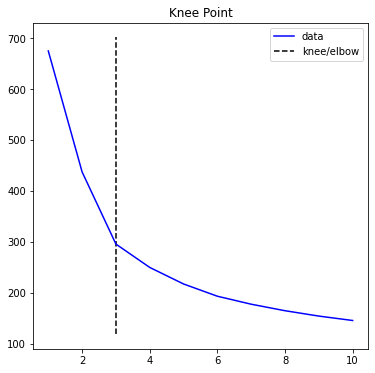

In [ ]:
# 시각화로 최적의 k를 확인해보세요.
kneedle.plot_knee()

### 문제 16. Clustering : 고객(메타데이터) - 정제된 메타데이터로 최적의 k 찾기 (Silhouette method)

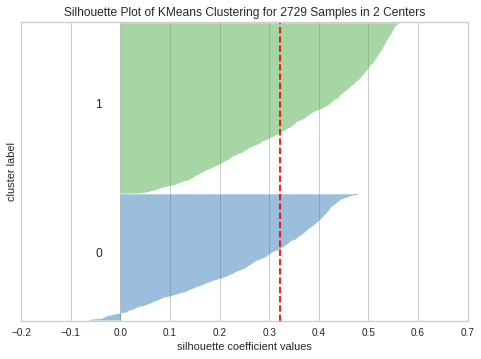

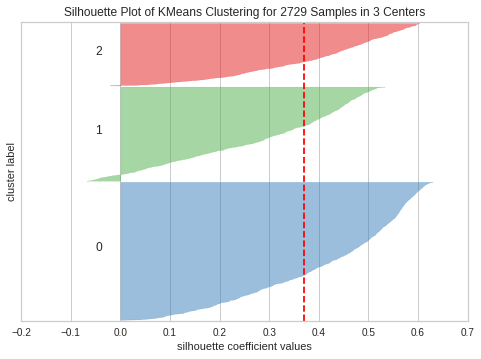

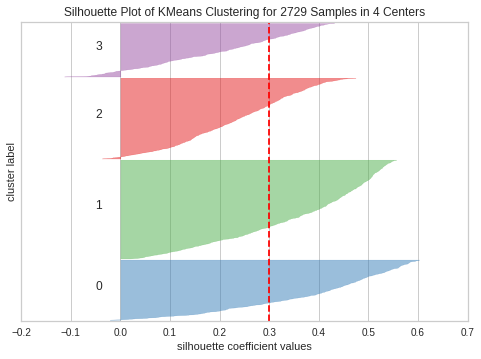

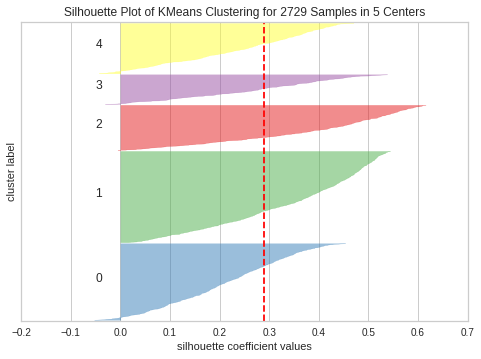

In [ ]:
# SilhouetteVisualizer 사용해서 훈련(training)과 그래프를 한번에 해결해보세요.
from yellowbrick.cluster import SilhouetteVisualizer

# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range(2,6)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_x)
    visualizer.poof()

### 문제 17. Clustering : 고객(메타데이터) - 정규화된 데이터로 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# kneed모듈로 정해진 최적의 k로 재훈련시켜보세요.
km = KMeans(n_clusters = 3, random_state=66)
km.fit(train_x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=66, tol=0.0001, verbose=0)

In [ ]:
user_metadata_cluser_centers = pd.DataFrame(km.cluster_centers_, columns=train_x.columns)
user_metadata_cluser_centers

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
0,0.615532,0.296141,0.146844,0.384468,0.646852,0.643991
1,0.727258,0.334576,0.111186,0.272742,0.201379,0.200595
2,0.308755,0.088896,0.045481,0.691245,0.302738,0.301589


In [ ]:
# 훈련된 모델의 label을 저장해주세요.
user_metadata_label_df = train_x.copy()
user_metadata_label_df["label_from_km"] = km.labels_
user_metadata_label_df.groupby(["label_from_km"]).count()

,birthday_year,category_prefer,recommended_cnt,age,days_from_joined,years_from_joined
label_from_km,,,,,,
0,872,872,872,872,872,872
1,1278,1278,1278,1278,1278,1278
2,579,579,579,579,579,579


In [ ]:
# 변수별로 변동성을 확인해보세요.
# [참고] 변수가 많거나 클러스터 종류가 많을 경우에 참고하기에 좋습니다.
user_metadata_cluser_centers.std()

birthday_year        0.216695
category_prefer      0.132153
recommended_cnt      0.051418
age                  0.216695
days_from_joined     0.233500
years_from_joined    0.232393
dtype: float64

In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"], 
               y=user_metadata_label_df["days_from_joined"], 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["recommended_cnt"], 
               y=user_metadata_label_df["days_from_joined"], 
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과를 시각화로 확인해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster"))

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"], 
               y=user_metadata_label_df["age"], 
               mode="markers",
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=user_metadata_label_df["days_from_joined"], 
               y=user_metadata_label_df["age"], 
               mode="markers",
               marker=dict(color=user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 3개의 변수로 3D 시각화를 확인해보세요.
fig = go.Figure(data=[go.Scatter3d(x=user_metadata_label_df["category_prefer"], 
                                   y=user_metadata_label_df["years_from_joined"], 
                                   z=user_metadata_label_df["age"],
                                   mode="markers",
                                   marker=dict(
                                            size=5,
                                            color=user_metadata_label_df["label_from_km"],
                                            opacity=0.7
                                        )
                                    )])
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="category_prefer"),
                    yaxis = dict(
                        title="years_from_joined"),
                    zaxis = dict(
                        title="age"),),
                )
fig.show()

### 문제 18. Clustering : 고객(메타데이터) - 훈련된 모델에 test set을 사용해 predict 하기

In [ ]:
# [문제 17]의 모델을 그대로 사용하여 prediction을 해보세요.
test_user_metadata_label_df = test_x.copy()
test_cluster = km.fit_predict(test_x)
test_user_metadata_label_df["label_from_km"] = test_cluster

In [ ]:
# [문제 17]과 동일하게 그래프로 prediction결과를 비교해보세요.
fig = make_subplots(rows=1, cols=2, subplot_titles=("Actual-test","K-means cluster-test"))

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"], 
               y=test_user_metadata_label_df["age"], 
               mode="markers",
               marker=dict(color=test_y),
               ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=test_user_metadata_label_df["days_from_joined"], 
               y=test_user_metadata_label_df["age"], 
               mode="markers",
               marker=dict(color=test_user_metadata_label_df["label_from_km"]),
               ),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_user_metadata_df = pd.concat([user_metadata_label_df, test_user_metadata_label_df])
trained_user_metadata_df = user_metadata_df.join(trained_user_metadata_df[["label_from_km"]])
trained_user_metadata_df.head(2)

,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,1
1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,1


## Step3: Clustering - 고객(수요) 거래데이터를 이용한 군집화.
: Step3에서는 고객 거래데이터를 사용합니다. HDBSCAN 모델을 훈련시키고 최적의 파라미터를 찾는 방법을 반복하여, 가장 적합한 모델로 훈련시킵니다.

### 문제 19. Clustering : 고객(거래데이터) - HDBSCAN 모델 install & 데이터 셋 분리하기
: HDBSCAN 모듈을 설치하고 고객 거래데이터를 train&test set 으로 분리하세요.

In [ ]:
!pip install hdbscan

     |████████████████████████████████| 4.7MB 7.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301734 sha256=de342be10d21c44724e457ada03727f6691a88f905d9ee41ce02cd5d3bee3d92
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [ ]:
# 고객 거래데이터를 살펴보세요. (user_stats_df)
user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17


In [ ]:
# 거래 데이터의 컬럼과 모델 훈련에 필요한 컬럼을 선택해보세요.
# [참고] 수치화되지 않은 컬럼을 제외하세요.
user_stats_df.columns

Index(['user_id', 'membership_type', 'total_order_cnt', 'total_cost',
       'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
       'monthly_order_cnt', 'avg_cost', 'avg_item_cost', 'last_date',
       'days_of_recency'],
      dtype='object')

In [ ]:
# 선택한 컬럼으로 데이터셋을 나눠주세요.
stats_columns = ['total_order_cnt', 'total_cost',
                  'avg_coupon_amt', 'avg_point_amt', 'weekly_order_cnt',
                  'monthly_order_cnt', 'avg_cost', 'avg_item_cost',
                  'days_of_recency']

X = user_stats_df[stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.
hdb_data_df = train_x.copy()

### 문제 20. Clustering : 고객(거래데이터) - HDBSCAN 모델 파라미터 탐색하기
: 고객 거래데이터의 clustering을 위해 HDBSCAN 모듈을 훈련시키고 파라미터를 탐색해보세요.

In [ ]:
# hdbscan 모듈을 import 합니다.
import hdbscan

In [ ]:
# min_samples 파라미터를 비교하는 함수를 만들어보세요.
# [참고] min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="total_cost" 로 설정해주세요. 

def opt_hdbscan(train_x, ms_list, data_df, min_cluster_size=30, label_name="hdbscan_label", x_col="total_order_cnt" , y_col="total_cost"):
  for ms in ms_list: 
    hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=ms, prediction_data=True).fit_predict(train_x)
    data_df[label_name] = hdbscan_label
    data_df[label_name] = data_df[label_name].astype(str)

    # outlier 추세확인. (outlier=클러스터명이 -1인 경우)
    hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
    outliers = hdbscan_case_dict[-1]

    # 시각화하기.
    fig = px.scatter(data_df, x=x_col, y=y_col, color=label_name)
    fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
    fig.show()

    # 군집별 데이터 분포 확인.
    hdb_cluster_df = data_df.groupby(label_name).mean()
    hdb_cluster_df["point_cnt"] = data_df[label_name].value_counts()
    print(hdb_cluster_df)
  return data_df

In [ ]:
# 만든 함수로 파라미터를 비교해보세요.
ms_list = [50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="hdbscan_label", x_col="avg_cost" , y_col="total_cost")


               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   27.183588  1.107261e+06     -764.120145    -137.343770   
0                    24.617021  7.974888e+05     -787.994740      -5.961304   
1                    11.052632  3.476503e+05     -652.911840      -7.373269   
2                     2.000000  4.164617e+04     -519.531250      -3.085938   
3                     1.000000  3.216376e+04     -312.080537       0.000000   
4                     1.003536  2.872013e+04     -483.026874     -20.721358   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     1.820502           5.333380  39376.198470   
0                      1.691373           4.654965  35624.812447   
1                      1.407206           2.821272  35008.708158   
2                      1.16

               total_order_cnt    total_cost  avg_coupon_amt  avg_point_amt  \
hdbscan_label                                                                 
-1                   46.585132  1.904988e+06     -798.786088      -0.905140   
0                    24.712644  7.930534e+05     -789.960954      -6.357354   
1                    10.733333  3.307158e+05     -682.120511     -12.452632   
2                     1.198624  3.429988e+04     -496.825397     -58.750000   

               weekly_order_cnt  monthly_order_cnt      avg_cost  \
hdbscan_label                                                      
-1                     2.320696           8.343125  42059.703261   
0                      1.688731           4.636973  35515.225747   
1                      1.373316           2.572593  34506.422222   
2                      1.036894           1.091934  29800.819261   

               avg_item_cost  days_of_recency  point_cnt  
hdbscan_label                                            

### 문제 21. Clustering : 고객(거래데이터) - HDBSCAN 모델에 원데이터 훈련시키기

In [ ]:
ms = 50
hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=ms, prediction_data=True).fit_predict(train_x)
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

In [ ]:
# outlier 추세확인.
hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화하기.
fig = px.scatter(hdb_data_df, x="avg_cost", y="total_cost", color="hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인.
hdb_cluster_df = hdb_data_df.groupby("hdbscan_label").mean()
hdb_cluster_df["point_cnt"] = hdb_data_df["hdbscan_label"].value_counts()
hdb_cluster_df

,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency,point_cnt
hdbscan_label,,,,,,,,,,
-1,27.183588,1.107261e+06,-764.120145,-137.343770,1.820502,5.333380,39376.198470,23955.497733,115.322670,719
0,24.617021,7.974888e+05,-787.994740,-5.961304,1.691373,4.654965,35624.812447,22471.955000,171.127660,94
1,11.052632,3.476503e+05,-652.911840,-7.373269,1.407206,2.821272,35008.708158,19926.384211,162.842105,76
2,2.000000,4.164617e+04,-519.531250,-3.085938,1.164062,1.390625,20823.085938,14033.203125,70.656250,128
3,1.000000,3.216376e+04,-312.080537,0.000000,1.000000,1.000000,32163.758389,0.000000,69.620805,298
4,1.003536,2.872013e+04,-483.026874,-20.721358,1.000707,1.001414,28696.082037,22674.080622,62.291372,1414


### 문제 22. Clustering : 고객(거래데이터) - 원데이터에서 불필요한 정보 제거하기
: 변별력이 없고 영향력이 작은 변수들을 제거하고(변수정리측면) 치우친 데이터를 거르는 과정을(데이터 측면) 거쳐봅니다.

In [ ]:
# 변수간 상관계수를 살펴보세요.
# [참고] 변수간 상관관계가 높은 경우를 중점적으로 제외해봅니다.
corr_matrix = user_stats_df.corr()
corr_matrix[corr_matrix > 0.7]

,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,days_of_recency
membership_type,1.000000,0.754893,NaN,NaN,NaN,NaN,0.740572,NaN,NaN,NaN
total_order_cnt,0.754893,1.000000,0.844748,NaN,NaN,0.920791,0.981847,NaN,NaN,NaN
total_cost,NaN,0.844748,1.000000,NaN,NaN,0.792244,0.829667,NaN,NaN,NaN
avg_coupon_amt,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
avg_point_amt,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
weekly_order_cnt,NaN,0.920791,0.792244,NaN,NaN,1.000000,0.956138,NaN,NaN,NaN
monthly_order_cnt,0.740572,0.981847,0.829667,NaN,NaN,0.956138,1.000000,NaN,NaN,NaN
avg_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
avg_item_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
days_of_recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
# 남기고 싶은 변수만으로 HDBSCAN을 다시 훈련시켜보세요.
selected_stats_columns = ["total_order_cnt", "avg_coupon_amt", "avg_point_amt", "avg_cost", "days_of_recency", "avg_item_cost"]

X = user_stats_df[selected_stats_columns]
Y = user_stats_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


In [ ]:
# [문제 21]에서 만든 함수를 사용해서 파라미터를 비교해보세요.
hdb_data_df = train_x.copy()

ms_list = [30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, hdb_data_df, label_name="trim_hdbscan_label", x_col="avg_cost" , y_col="total_order_cnt")


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        12.892144    -1450.313950    -163.040156   
0                          2.045024      -16.257296       0.000000   
1                          9.176093     -273.205088     -10.051756   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  40367.200879        94.379494   23693.968389        751  
0                   25382.056256        77.199052      36.706161        422  
1                   29649.649916        82.496144   24021.048618       1556  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        10.363366    -1147.770366    -121.251101   
0                          9.507597     -246.619772     -10.787347   
1                          2.173432      -17.712076       0.000000   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  37377.512584        89.065347   20377.848931       1010  
0                   29660.031996        82.948895   23891.249544       1448  
1                   23848.106384        80.276753      37.841882        271  


                    total_order_cnt  avg_coupon_amt  avg_point_amt  \
trim_hdbscan_label                                                   
-1                        10.295455    -1021.703637    -116.584859   
0                          1.662162       -9.868674       0.000000   
1                          9.360441     -303.269184     -10.317077   

                        avg_cost  days_of_recency  avg_item_cost  point_cnt  
trim_hdbscan_label                                                           
-1                  36868.169962        90.095644   19356.247093       1056  
0                   23110.279324        79.630631      18.185901        222  
1                   29702.674969        82.013784   23943.609724       1451  


In [ ]:
# 남기고 싶은 변수를 설정하세요.
selected_stats_columns = ["total_order_cnt", 'total_cost', 'avg_cost', 'days_of_recency', "monthly_order_cnt"]

# total_order_cnt의 기준을 정해서 데이터를 걸러주세요.
trim_df = user_stats_df[user_stats_df["total_order_cnt"]>=10]

X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

504 127


In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.
trim_hdb_data_df = train_x.copy()

In [ ]:

ms_list = [10, 20, 30, 50, 70]
hdb_data_df = opt_hdbscan(train_x, ms_list, trim_hdb_data_df, min_cluster_size=10, label_name="trim_hdbscan_label", x_col="avg_cost" , y_col="total_order_cnt")

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        83.155844  3.899229e+06  54004.739351   
0                         94.700000  3.319728e+06  37767.605500   
1                         68.380952  2.652614e+06  40217.440000   
2                         55.652174  2.099701e+06  40631.185000   
3                         38.200000  1.753997e+06  51167.593333   
4                         27.338462  9.010137e+05  34923.934308   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       176.012987          14.195238         77  
0                        180.350000          16.790000         20  
1                        179.380952          11.500000         21  
2                        174.369565           9.689855         46  
3                        176.400000           6.435556 

                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        84.301724  3.652644e+06  48314.297586   
0                         55.054054  2.068738e+06  40370.790270   
1                         28.304843  9.624378e+05  36031.146952   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       177.422414          14.438649        116  
0                        173.459459           9.760811         37  
1                        171.695157           5.192688        351  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        78.522059  3.421244e+06  49413.286544   
0                         56.393939  2.056246e+06  39039.543636   
1                         27.495522  9.102100e+05  35034.622179   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       177.823529          13.420588        136  
0                        173.242424           9.893939         33  
1                        171.232836           5.095423        335  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        50.332432  1.994763e+06  40849.897568   
0                         34.733333  1.156022e+06  35204.539333   
1                         14.424242  4.604227e+05  33632.868485   
2                         24.779070  7.845249e+05  34798.784767   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       173.656757           8.819640        370  
0                        173.666667           6.046667         15  
1                        170.030303           3.226263         33  
2                        172.034884           4.630620         86  


                    total_order_cnt    total_cost      avg_cost  \
trim_hdbscan_label                                                
-1                        48.191542  1.895881e+06  40209.016119   
0                         13.428571  4.705207e+05  37212.116429   
1                         24.886364  7.878905e+05  34774.048068   

                    days_of_recency  monthly_order_cnt  point_cnt  
trim_hdbscan_label                                                 
-1                       173.788557           8.481799        402  
0                        164.500000           2.917857         14  
1                        171.568182           4.637879         88  


### 문제 23. Clustering : 고객(거래데이터) - Normalization(정규화) 적용하기
: 고객 거래데이터에 정규화를 적용해서 모델을 훈련시켜보세요.

In [ ]:
# 정규화에 사용되는 모듈 import.
from sklearn.preprocessing import StandardScaler

In [ ]:
# StandardScaler를 사용하여 [문제 22]에서 사용된 데이터를 정규화 시켜보세요.
X = trim_df[selected_stats_columns]
Y = trim_df["membership_type"]

stand_scaler = StandardScaler()
scaled_user_trans = stand_scaler.fit_transform(X)
scaled_user_trans_df = pd.DataFrame(scaled_user_trans, columns=X.columns)
scaled_user_trans_df.head()


,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt
0,-0.717385,-0.592822,-0.409145,0.118127,-0.520225
1,-0.747089,-0.312006,0.871160,0.118127,-0.724615
2,1.480762,0.845128,-0.137871,0.365146,1.390377
3,-0.390633,-0.428904,-0.413519,0.550410,-0.298062
4,0.411393,0.617040,0.462381,0.488655,0.323994


In [ ]:
# 인덱스가 초기화되었기 때문에 원래 인덱스로 할당해 줍니다. (원데이터 찾아가는 과정에서 사용할 수 있습니다.)
scaled_user_trans_df.index = X.index

In [ ]:
# 정규화된 데이터셋을 train/test set으로 나눠주세요.
train_x, test_x, train_y, test_y = train_test_split(scaled_user_trans_df, Y, test_size=0.1)
print(len(train_x), len(test_x))

567 64


In [ ]:
# 결과 라벨을 저장하기 위한 dataframe을 생성합니다.
scaled_hdb_data_df = train_x.copy()

In [ ]:

ms_list = [1, 3, 5, 10, 20]
scaled_hdb_data_df = opt_hdbscan(train_x, ms_list, scaled_hdb_data_df, min_cluster_size=10, label_name="scaled_hdbscan_label", x_col="total_order_cnt" , y_col="days_of_recency")

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.463142    0.508464  0.370146        -0.289780   
0                           -0.790939   -0.566161 -0.141766        -1.978595   
1                           -0.640153   -0.132228  1.101024         0.013144   
2                           -0.717385   -0.541889 -0.185014        -0.936851   
3                            1.503041    0.650134 -0.311968         0.510270   
4                            0.820404    0.558723 -0.002804         0.414233   
5                           -0.369354   -0.347220 -0.229600         0.306760   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.537177        190  
0                             -0.711779         21  
1                             -0.701510         10  
2             

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.333865    0.367506  0.287264        -0.281870   
0                           -0.739663   -0.506350  0.032425        -1.785979   
1                            1.474397    0.705550 -0.248006         0.523944   
2                           -0.725486   -0.537522 -0.141438        -0.864335   
3                            0.814529    0.522692 -0.037098         0.419843   
4                           -0.377535   -0.348625 -0.222997         0.314332   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.400900        241  
0                             -0.673024         12  
1                              1.384029         14  
2                             -0.782512         11  
3                              0.726004  

                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.268753    0.272761  0.194412        -0.296913   
0                            0.810870    0.505688 -0.052491         0.437548   
1                           -0.388825   -0.358583 -0.224802         0.355480   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.307606        308  
0                              0.722356         29  
1                             -0.433846        230  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.256678    0.249001  0.168737        -0.253521   
0                            0.772801    0.471246 -0.060761         0.439766   
1                           -0.408708   -0.365698 -0.225195         0.360194   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.288126        331  
0                              0.684392         24  
1                             -0.452305        212  


                      total_order_cnt  total_cost  avg_cost  days_of_recency  \
scaled_hdbscan_label                                                           
-1                           0.249852    0.247037  0.176412        -0.234239   
0                            0.769038    0.460870 -0.067206         0.419490   
1                           -0.432249   -0.392639 -0.255682         0.357197   

                      monthly_order_cnt  point_cnt  
scaled_hdbscan_label                                
-1                             0.275972        340  
0                              0.680640         25  
1                             -0.470000        202  


### 문제 24. Clustering : 고객(거래데이터) - HDBSCAN 모델에 정규화된 데이터 훈련시키기

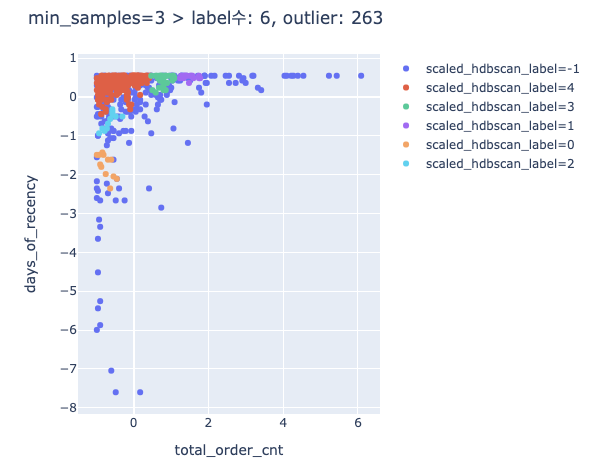

In [ ]:
ms=3
hdb_model = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=ms, prediction_data=True).fit(train_x)
hdbscan_label = hdb_model.labels_
scaled_hdb_data_df["scaled_hdbscan_label"] = hdbscan_label
scaled_hdb_data_df["scaled_hdbscan_label"] = scaled_hdb_data_df["scaled_hdbscan_label"].astype(str)
scaled_hdb_data_df.head(2)

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
2717,0.054937,-0.423501,-0.793583,0.488655,0.635023,-1
492,-0.747089,-0.675902,-0.703507,0.365146,0.235129,-1


In [ ]:
# outlier 추세확인.
hdbscan_case_dict = dict((x,list(hdbscan_label).count(x)) for x in set(hdbscan_label))
outliers = hdbscan_case_dict[-1]

# 시각화하기.
# x_col="total_order_cnt" , y_col="days_of_recency"
fig = px.scatter(scaled_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"min_samples={ms} > label수: {len(set(hdbscan_label))}, outlier: {outliers}")
fig.show()

# 군집별 데이터 분포 확인.
trim_hdb_cluster_df = scaled_hdb_data_df.groupby("scaled_hdbscan_label").mean()
trim_hdb_cluster_df["point_cnt"] = scaled_hdb_data_df["scaled_hdbscan_label"].value_counts()
trim_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,0.333865,0.367506,0.287264,-0.281870,0.400900,241
0,-0.739663,-0.506350,0.032425,-1.785979,-0.673024,12
1,1.474397,0.705550,-0.248006,0.523944,1.384029,14
2,-0.725486,-0.537522,-0.141438,-0.864335,-0.782512,11
3,0.814529,0.522692,-0.037098,0.419843,0.726004,35
4,-0.377535,-0.348625,-0.222997,0.314332,-0.428398,254


In [ ]:
scaled_hdb_data_df.head()

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,scaled_hdbscan_label
2717,0.054937,-0.423501,-0.793583,0.488655,0.635023,-1
492,-0.747089,-0.675902,-0.703507,0.365146,0.235129,-1
1700,6.084989,2.924683,-0.387172,0.550410,5.981747,-1
673,0.054937,-0.050609,-0.148145,0.488655,-0.031467,4
2179,-0.360928,-0.428904,-0.451204,0.488655,-0.446171,4


In [ ]:
# 시각화 하고자하는 변수를 선택하세요.
COL_LIST = ["total_order_cnt", "total_cost", "avg_cost", "days_of_recency"]
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"coral", -1:"grey"}

# 변수별로 시각화를 해보세요.
# [참고] for loop을 사용해서 subplot을 생성해보세요. (rows=len(COL_LIST)-1, cols=len(COL_LIST))
fig = make_subplots(rows=4, cols=5)

# i: x축이될 변수명.
for i in range(0, len(COL_LIST)+1):
  # i=5이면 중지.
  if i == len(COL_LIST): break
  x_col = COL_LIST[i]
  # j: y축이될 변수명.
  for j in range(i, len(COL_LIST)+1):
    # j=5이면 중지.
    if j == len(COL_LIST): break
    y_col = COL_LIST[j]
    # label별로 색깔 할당.
    for c in range(0, len(set(hdbscan_label))):
      sub_df = scaled_hdb_data_df[scaled_hdb_data_df["scaled_hdbscan_label"]==f"{c-1}"]
      fig.add_trace(
          go.Scatter(x=sub_df[x_col], 
                    y=sub_df[y_col], 
                    mode="markers",
                    marker=dict(color=LABEL_COLOR[c-1], opacity=0.5),
                    name=f"{c-1}", 
                    legendgroup=f"{c-1}",

                    ),
          row=i+1, col=j+1
      )
    fig.update_xaxes(title_text=f"{x_col}", row=i+1, col=j+1)
    fig.update_yaxes(title_text=f"{y_col}", row=i+1, col=j+1)

fig.update_layout(height=1500, width=1500)
fig.show()


### 문제 25. Clustering : 고객(거래데이터) - HDBSCAN 모델에 test 데이터 예측하기

In [ ]:
# label을 저장할 test set을 복사해주세요.
test_hdb_data_df = test_x.copy()

# 위에서 훈련한 모델을 사용하여 test set(test_x)의 label을 예측해보세요.
# [참고] hdbscan.approximate_predict()를 사용해보세요.
test_label, _ = hdbscan.approximate_predict(hdb_model, test_x)

# label 결과를 저장하고 그래프를 그리기 위해 label을 string 포멧으로 변경해주세요.
test_hdb_data_df["scaled_hdbscan_label"] = test_label
test_hdb_data_df["scaled_hdbscan_label"] = test_hdb_data_df["scaled_hdbscan_label"].astype(str)

In [ ]:
# 시각화하기.
fig = px.scatter(test_hdb_data_df, x="total_order_cnt", y="days_of_recency", color="scaled_hdbscan_label")
fig.update_layout(width=600, height=500, title=f"Predicted label for test set")
fig.show()

# 군집별 데이터 분포 확인.
test_hdb_cluster_df = test_hdb_data_df.groupby("scaled_hdbscan_label").mean()
test_hdb_cluster_df["point_cnt"] = test_hdb_data_df["scaled_hdbscan_label"].value_counts()
test_hdb_cluster_df

,total_order_cnt,total_cost,avg_cost,days_of_recency,monthly_order_cnt,point_cnt
scaled_hdbscan_label,,,,,,
-1,-0.212405,-0.193871,0.041843,-0.317899,-0.139900,33
0,-0.761942,-0.609509,-0.367510,-2.043290,-0.742388,2
3,0.678736,0.513419,0.061345,0.550410,0.590590,1
4,-0.321676,-0.324922,-0.262832,0.393818,-0.371270,28


In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_user_stats_df = pd.concat([scaled_hdb_data_df, test_hdb_data_df])
trained_user_stats_df = user_stats_df.join(trained_user_stats_df[["scaled_hdbscan_label"]])
trained_user_stats_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,NaN


In [ ]:
# label이 없는 데이터수를 확인합니다.
trained_user_stats_df[trained_user_stats_df["total_order_cnt"]<10].isnull().sum()

user_id                    0
membership_type            0
total_order_cnt            0
total_cost                 0
avg_coupon_amt             0
avg_point_amt              0
weekly_order_cnt           0
monthly_order_cnt          0
avg_cost                   0
avg_item_cost              0
last_date                  0
days_of_recency            0
scaled_hdbscan_label    2781
dtype: int64

## Step4: Clustering - 고객(수요) 거래데이터를 활용한 RMF 분석

### RFM 분석 기초 이해하기  
: 고객 분석의 기본으로 사용되는 RFM 분석 내용을 이해해보세요.


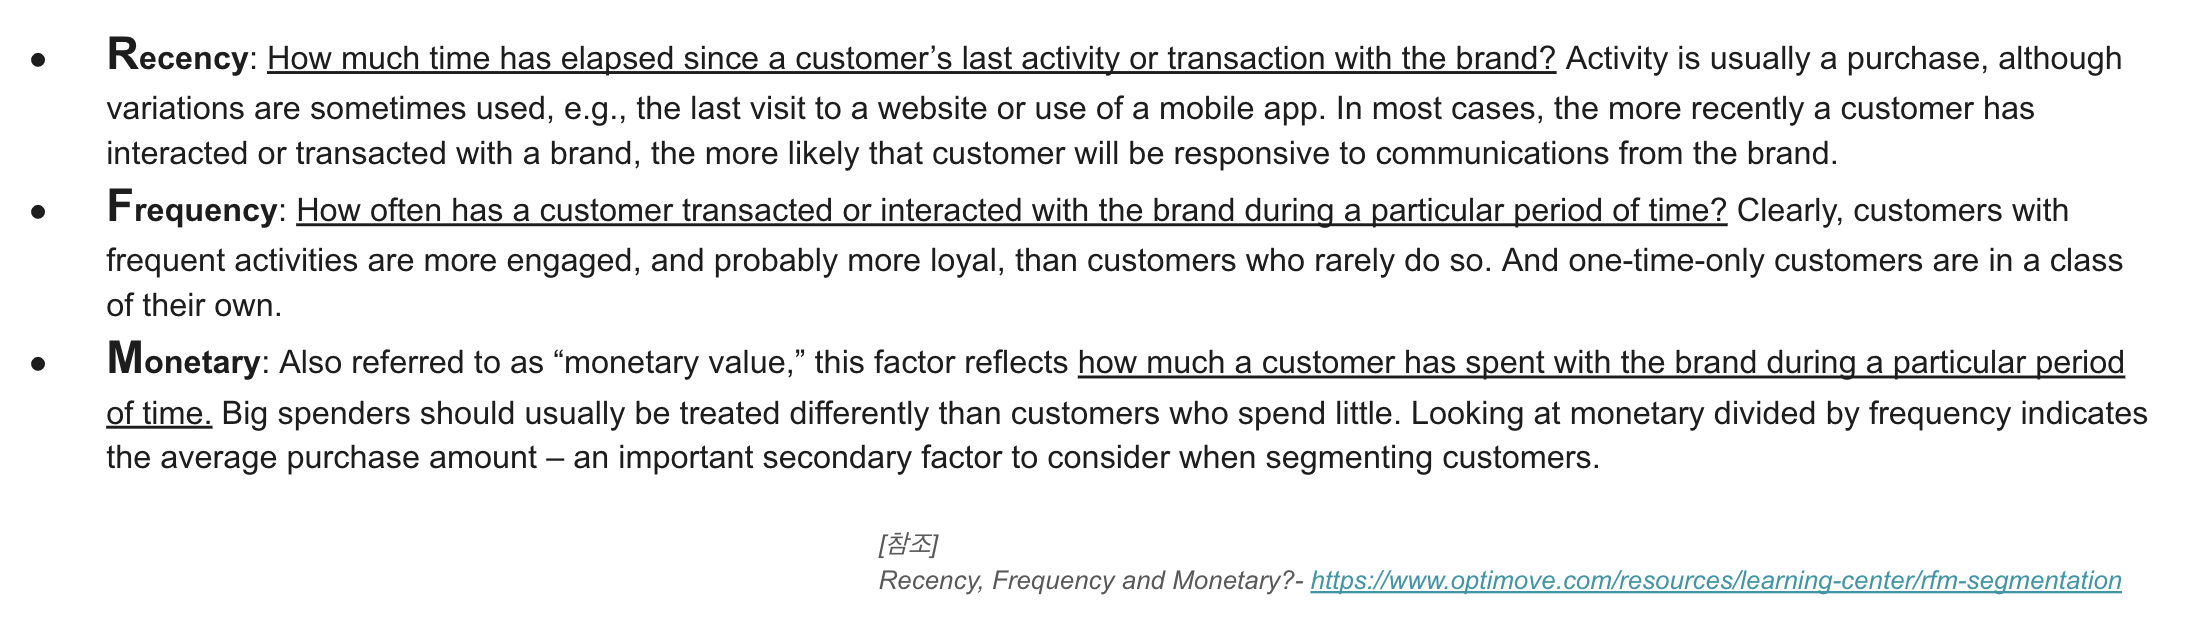

### 문제 26. EDA : 고객(거래데이터) - RFM 분석을 하기 위한 데이터 생성하기

In [ ]:
# R(Recency), F (Frequency), M (Monetary) 변수를 생성해보세요.
# [참고] 거래데이터 기간동안의 RFM을 계산하세요.
user_rfm_df =  user_stats_df[["user_id", "membership_type", "total_order_cnt", "total_cost", "days_of_recency"]]
user_rfm_df.rename(columns={"days_of_recency":"R","total_order_cnt":"F", "total_cost":"M"}, inplace=True)
user_rfm_df.head()

,user_id,membership_type,F,M,R
0,q3qlSo1pvyacJoy,100,1.0,23800.0,96
1,JRy7QRK0UMFP81X,100,1.0,23000.0,17
2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,136
3,EoRzAGlei59fugN,100,1.0,22000.0,62
4,zgQJlOYlFURl6ev,300,19.0,561200.0,175


### 문제 27. Clustering : 고객(거래데이터) - RFM 컬럼으로 K-Means 훈련시켜보기

In [ ]:
# 생성된 RFM 컬럼만 사용해서 K-means를 훈련시켜보세요.
rfm_columns = ["R","F","M"]
km = KMeans(n_clusters = 8)
km.fit(user_rfm_df[rfm_columns])
pd.DataFrame(km.cluster_centers_, columns=rfm_columns)


,R,F,M
0,65.826794,1.536232,4.475542e+04
1,173.988439,45.809249,1.705028e+06
2,180.400000,164.300000,8.230261e+06
3,182.000000,207.500000,1.727159e+07
4,179.197917,78.083333,3.077275e+06
5,182.000000,87.000000,2.825470e+07
6,171.569395,24.825623,8.285774e+05
7,174.300000,100.500000,5.241260e+06


In [ ]:
# 각 군집별 데이터 수를 확인해보세요.
# [참고] k를 변경해보면서 비교해보세요.
label_list = list(km.labels_)
[[x,label_list.count(x)] for x in set(label_list)]

[[0, 2829], [1, 172], [2, 10], [3, 2], [4, 96], [5, 1], [6, 282], [7, 20]]

### 문제 28. Clustering : 고객(거래데이터) - RFM 컬럼에 custom Normalization(정규화) 적용하기  
: 단위가 다른 RFM 컬럼을 비지니스 특성을 반영하여 custom Normalization(정규화) (or 점수화) 시켜보세요. (i.e., 단가, 리텐션 등)

In [ ]:
# 컬럼별 분위수/최대값/최소값 등을 확인해보세요.
user_rfm_df.describe()

,membership_type,F,M,R
count,3412.000000,3412.000000,3.412000e+03,3412.000000
mean,153.575615,9.055686,3.516288e+05,84.283118
std,106.964154,21.780867,1.068412e+06,63.346044
min,100.000000,1.000000,0.000000e+00,1.000000
25%,100.000000,1.000000,2.500000e+04,28.750000
50%,100.000000,1.000000,3.700000e+04,67.000000
75%,100.000000,2.000000,6.003750e+04,154.000000
max,500.000000,248.000000,2.825470e+07,182.000000


In [ ]:
## [R]
## 방법1: qcut으로 동일 데이터수로 점수할당.
# [참고] qcut을 사용해 나눌경우, 동일한 숫자가 걸쳐질 경우 나누기 어려움. 
user_rfm_df["R_rank"] = user_rfm_df["R"].rank(method="first")
user_rfm_df["R_score"] = pd.qcut(user_rfm_df["R_rank"], 5, labels=[1, 2, 3, 4, 5])

# 계산된 R_score의 분포를 살펴보세요.
grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,683,9.767204,5.216147,1,19
2,682,34.763930,8.390173,19,50
3,682,68.139296,11.391689,50,88
4,682,130.890029,24.866066,89,168
5,683,177.827233,3.990387,168,182


In [ ]:
## 방법2: cut으로 custom 점수할당.
user_rfm_df["R_score"] = pd.cut(user_rfm_df["R"], [0, 30, 90, 120, 180, 1000], labels=[1, 2, 3, 4, 5])

grouped_recen = user_rfm_df.groupby("R_score")
grouped_recen.agg(["count", "mean", "std", "min", "max"])["R"]

,count,mean,std,min,max
R_score,,,,,
1,909,13.564356,8.205476,1,30
2,1163,57.398108,17.361814,31,90
3,234,105.222222,8.959241,91,120
4,868,162.026498,17.521264,121,180
5,238,181.634454,0.482598,181,182


In [ ]:
## [F]
## 방법2: cut으로 custom 점수할당.
user_rfm_df["F_score"] = pd.cut(user_rfm_df['F'], [0,15,30,60,100,1000], labels=[1, 2, 3, 4,5])

## 방법3: 분위수로 결정.
# q1 = user_rfm_df["F"].quantile(0.90)
# q2 = user_rfm_df["F"].quantile(0.95)
# q3 = user_rfm_df["F"].quantile(0.98)

# def custom_qcut(f, q_list, label):
#     if f <= q1:
#         f_label = label[0]
#     elif f <= q2:
#         f_label = label[1]
#     elif f <= q3:
#         f_label = label[2]
#     else:
#         f_label = label[2]+1
#     return f_label

# user_rfm_df["F_score"] = user_rfm_df["F"].apply(custom_qcut, q_list=[q1,q2,q3], label=[1,2,3])

grouped_freq = user_rfm_df.groupby("F_score")
grouped_freq.agg(["count", "mean", "std", "min", "max"])["F"]



,count,mean,std,min,max
F_score,,,,,
1,2870,1.659930,2.192869,1.0,15.0
2,202,22.886139,4.238171,16.0,30.0
3,204,42.936275,8.283217,31.0,60.0
4,98,75.836735,9.815508,62.0,97.0
5,38,140.000000,39.970935,101.0,248.0


In [ ]:
## [M]
# Monetary 분위수를 확인해보세요.
user_rfm_df["M"].quantile([0.0, 0.3, 0.5, 0.7, 0.9, 1.0])

0.0           0.0
0.3       27000.0
0.5       37000.0
0.7       48146.0
0.9     1128430.0
1.0    28254700.0
Name: M, dtype: float64

In [ ]:
## 방법2: cut으로 custom 점수할당.
user_rfm_df["M_score"] = pd.cut(user_rfm_df['M'], [-1.0, 30000, 100000, 1000000, 3000000, 300000000], labels=[1, 2, 3, 4, 5])

grouped_mon = user_rfm_df.groupby("M_score")
grouped_mon.agg(["count", "mean", "std", "min", "max"])["M"]


,count,mean,std,min,max
M_score,,,,,
1,1274,2.142846e+04,5.943787e+03,0.0,30000.0
2,1421,4.364777e+04,1.200348e+04,30100.0,99400.0
3,340,5.457504e+05,2.569712e+05,111500.0,998610.0
4,295,1.715365e+06,5.526457e+05,1001200.0,2954800.0
5,82,5.107881e+06,3.670212e+06,3035220.0,28254700.0


### 문제 29. Clustering : 고객(거래데이터) - 정규화된 RFM 데이터셋 나누기
: 모델 훈련을 위해 정규화된 데이터 셋을 train/test로 분리해보세요.

In [ ]:
# RFM 데이터를 X,Y로 나눠보세요.
rfm_score_columns = ["R_score", "F_score", "M_score"]
X = user_rfm_df[rfm_score_columns]
Y = user_rfm_df["membership_type"]

# train_test_split를 사용하여 데이터를 train/test로 8:2의 비율로 나눠보세요.
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

2729 683


### 문제 30. Clustering : 고객(거래데이터) - 정규화된 데이터로 최적의 k 찾기 (kneed 모듈)

In [ ]:
# distortions에 kneed모듈 사용에 필요한 값을 저장해보세요
distortions = [] 
k_range = range(1,11)

for i in k_range:
  km = KMeans(n_clusters = i, random_state=42)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

[9353.984609747162, 3939.3689140801566, 2062.663093780271, 1554.2360758173052, 1139.9617932421806, 905.7896461326907, 717.884830777235, 563.1234057449105, 458.04184034229297, 378.43684295936185]


In [ ]:
kneedle = KneeLocator(x=k_range, y=distortions, S=1.0, curve="convex", direction="decreasing")
print(f"최적의 k : {round(kneedle.elbow, 3)}")
print(f"최적의 k의 y값 : {round(kneedle.elbow_y, 3)}")

최적의 k : 3
최적의 k의 y값 : 2062.663


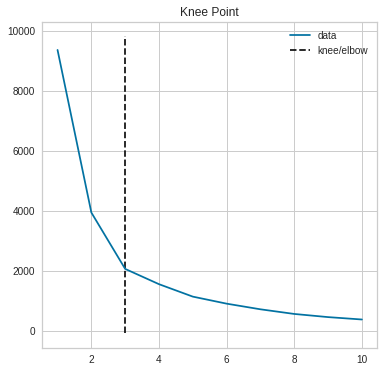

In [ ]:
# 시각화로 최적의 k를 확인해보세요.
kneedle.plot_knee()

### 문제 31. Clustering : 고객(거래데이터) - 정제된 RFM 데이터로 최적의 k 찾기 (Silhouette method)

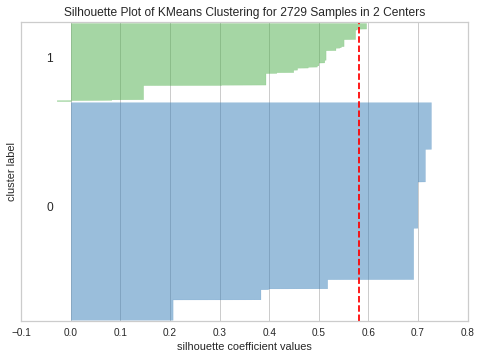

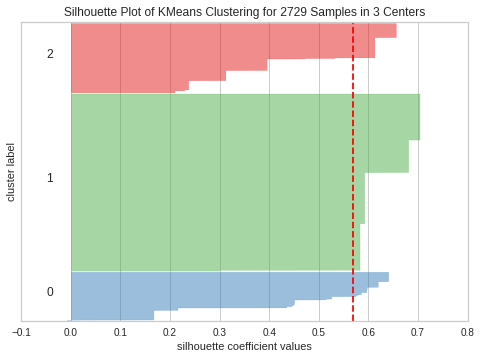

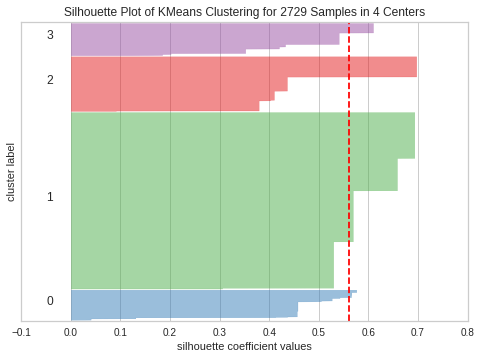

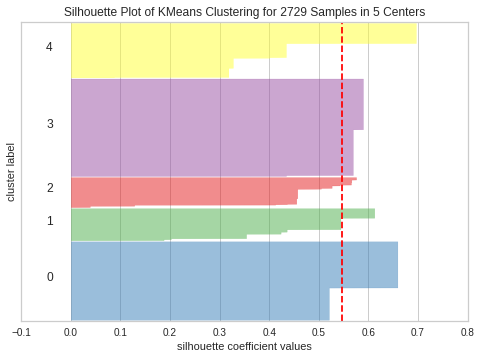

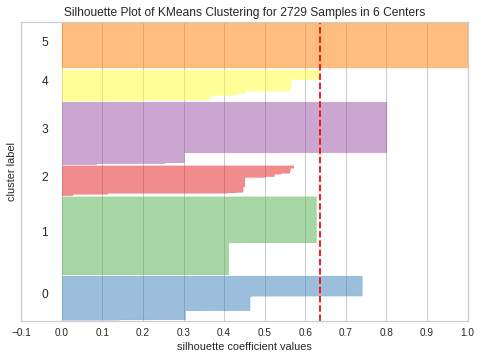

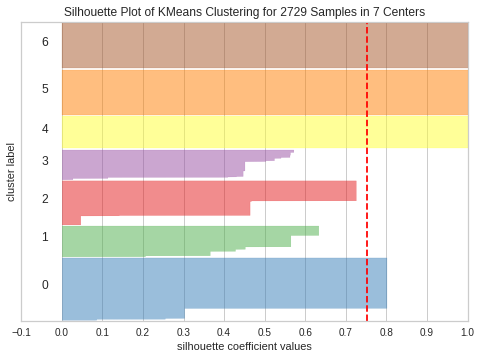

In [ ]:
# k의 범위를 지정해주세요.
# [주의!] 최소 2개이상의 label/cluster가 있어야 합니다.
k_range = range(2,8)
for i in k_range:
    km = KMeans(n_clusters=i, init="k-means++")
    visualizer = SilhouetteVisualizer(km)
    visualizer.fit(train_x)
    visualizer.poof()

### 문제 32. Clustering : 고객(거래데이터) - 정규화된 데이터로 훈련된 K-Means 결과 확인/해석하기

In [ ]:
# 위의 결과를 조합하여 결정한 최적의 k로 k-means를 훈련시켜보세요.
model = KMeans(n_clusters = 5)
km = model.fit(train_x)
km_label = km.labels_

rfm_train_df = train_x.copy()
rfm_train_df[["R_score","F_score","M_score"]] = rfm_train_df[["R_score","F_score","M_score"]].astype(int)
rfm_train_df["km_label"] = km_label

rfm_cluster_df = rfm_train_df.groupby("km_label").mean()
rfm_cluster_df["point_cnt"] = rfm_train_df["km_label"].value_counts()
rfm_cluster_df


,R_score,F_score,M_score,point_cnt
km_label,,,,
0,1.000000,1.000000,1.586538,728
1,4.126667,1.546667,3.180000,300
2,3.818841,1.000000,1.326087,414
3,2.093347,1.000000,1.579940,1007
4,4.475000,3.496429,4.164286,280


In [ ]:
model = KMeans(n_clusters = 6)
km = model.fit(train_x)
km_label = km.labels_

rfm_train_df = train_x.copy()
rfm_train_df[["R_score","F_score","M_score"]] = rfm_train_df[["R_score","F_score","M_score"]].astype(int)
rfm_train_df["km_label"] = km_label

rfm_cluster_df = rfm_train_df.groupby("km_label").mean()
rfm_cluster_df["point_cnt"] = rfm_train_df["km_label"].value_counts()
rfm_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,3.667323,1.000000,1.450787,508
1,4.475000,3.496429,4.164286,280
2,2.000000,1.002070,2.020704,483
3,1.000000,1.000000,1.586538,728
4,2.000000,1.000000,1.000000,431
5,4.133779,1.545151,3.177258,299


### 문제 33. Clustering : 고객(거래데이터) - K-Means 모델에 test 데이터 예측하기

In [ ]:
# [문제 32]의 모델을 그대로 사용하여 prediction을 해보세요.
test_cluster = km.predict(test_x)

rfm_test_df = test_x.copy()
rfm_test_df[["R_score","F_score","M_score"]] = rfm_test_df[["R_score","F_score","M_score"]].astype(int)
rfm_test_df["km_label"] = test_cluster

rfm_test_cluster_df = rfm_test_df.groupby("km_label").mean()
rfm_test_cluster_df["point_cnt"] = rfm_test_df["km_label"].value_counts()
rfm_test_cluster_df

,R_score,F_score,M_score,point_cnt
km_label,,,,
0,3.664062,1.000000,1.390625,128
1,4.442623,3.557377,4.131148,61
2,2.000000,1.007576,2.022727,132
3,1.000000,1.000000,1.613260,181
4,2.000000,1.000000,1.000000,115
5,4.181818,1.545455,3.136364,66


In [ ]:
# 시각화를 위해 색깔을 지정해주세요.
LABEL_COLOR = {0:"red", 1:"green", 2:"blue", 3:"yellow", 4:"orange", 5:"silver"}
rfm_test_df["km_label_color"] = rfm_test_df["km_label"].map(LABEL_COLOR)

In [ ]:
# 3D 그래프로 변수 3개를 시각화해보세요. 
fig = go.Figure(data=[go.Scatter3d(x=rfm_test_df["R_score"], 
                                   y=rfm_test_df["F_score"], 
                                   z=rfm_test_df["M_score"],
                                   mode='markers',
                                   marker=dict(color=rfm_test_df["km_label_color"], opacity=0.5))])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(
                    xaxis = dict(
                        title="R_score"),
                    yaxis = dict(
                        title="F_score"),
                    zaxis = dict(
                        title="M_score"),),
                )

fig.show(showlegend=True)

In [ ]:
# 훈련결과 label을 원데이터셋에 추가해주세요.
trained_rfm_df = pd.concat([rfm_train_df, rfm_test_df])
trained_rfm_df = user_stats_df.join(trained_rfm_df)
trained_rfm_df.head(2)

,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label,km_label_color
0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,0,NaN
1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,3,NaN


## Step5: 활용사례 - 고객 군집화를 통해 맴버십 등급의 특징을 파악
: Step2, 3, 4의 결과를 사용하여 맴버십 등급별 특징을 확인해보세요.

### Labeling된 데이터 불러오기

In [3]:
# 데이터 url.
user_metadata_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_metadata_with_labels.csv"
user_stats_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_stats_with_labels.csv"
user_rfm_with_labels_url = "https://raw.githubusercontent.com/dajeong-lecture/raw_data/main/user_rfm_with_labels.csv"

# 위의 url를 사용해서 각각의 labeling된 DataFrame을 생성해보세요.
trained_user_metadata_df = pd.read_csv(user_metadata_with_labels_url, parse_dates=[0])
trained_user_stats_df = pd.read_csv(user_stats_with_labels_url, parse_dates=[0])
trained_rfm_df = pd.read_csv(user_rfm_with_labels_url, parse_dates=[0])

### 문제 34. 메타데이터 그룹의 특징으로 naming해보기.

In [4]:
# Step 2 - user metadata
trained_user_metadata_df.head(2)

,Unnamed: 0,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km
0,0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0
1,1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0


In [5]:
# [문제 18]을 참고해서 메타데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] category_prefer, years_from_joined, age
trained_user_metadata_df.groupby("label_from_km").agg(user_cnt=("user_id","count"),
                                                      avg_category_prefer=("category_prefer","mean"),
                                                      avg_years_from_joined=("years_from_joined","mean"),
                                                      avg_age=("age","mean"),
                                                      )

,user_cnt,avg_category_prefer,avg_years_from_joined,avg_age
label_from_km,,,,
0,1599,5.747342,0.997999,26.535960
1,1074,5.014898,3.223091,30.870577
2,739,1.499323,1.490934,43.078484


In [6]:
# 메타데이터 그룹의 명칭을 할당하세요.
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 0), "group_name"] = "Young&Trendy Customers"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 1), "group_name"] = "Loyal Customers"
trained_user_metadata_df.loc[(trained_user_metadata_df.label_from_km == 2), "group_name"] = "Aged Customers"


In [7]:
trained_user_metadata_df.head(2)

,Unnamed: 0,user_id,sex,birthday_year,membership_type,category_prefer,joined_date,deleted_date,join_path,os,recommended_cnt,age,days_from_joined,years_from_joined,if_deleted,label_from_km,group_name
0,0,KjIRvUKVTgxGaek,0,1995,300,3,2019-09-09,NaT,0.0,AOS,4,27,480,1.3,0,0,Young&Trendy Customers
1,1,QWhJIG1fOkhUJzG,1,1995,300,2,2020-04-13,NaT,0.0,AOS,1,27,263,0.7,0,0,Young&Trendy Customers


### 문제 35. 메타데이터와 고객 맴버십 등급의 연관성을 찾아보세요.

In [8]:
ttl_membership_cnt = trained_user_metadata_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2667
300,513
400,126
500,106


In [9]:
metadata_pivot_df = pd.pivot_table(trained_user_metadata_df, 
               values="user_id", 
               columns=["group_name"],
               index=["membership_type"], 
               aggfunc="count")

metadata_pivot_df

group_name,Aged Customers,Loyal Customers,Young&Trendy Customers
membership_type,,,
100,538,821,1308
300,143,170,200
400,36,43,47
500,22,40,44


In [10]:
metadata_pivot_df["Aged Customers"] = metadata_pivot_df["Aged Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Loyal Customers"] = metadata_pivot_df["Loyal Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Young&Trendy Customers"] = metadata_pivot_df["Young&Trendy Customers"]/ttl_membership_cnt["user_id"]
metadata_pivot_df["Total(%)"] = 1.0

In [11]:

metadata_pivot_df

group_name,Aged Customers,Loyal Customers,Young&Trendy Customers,Total(%)
membership_type,,,,
100,0.201725,0.307837,0.490439,1.0
300,0.278752,0.331384,0.389864,1.0
400,0.285714,0.341270,0.373016,1.0
500,0.207547,0.377358,0.415094,1.0


### 문제 36. 거래데이터 그룹의 특징으로 naming해보기

In [12]:
# label이 없는 그룹의 그룹명을 임의로 할당해주세요 (i.e., 99)
trained_user_stats_df["scaled_hdbscan_label"] = np.where(trained_user_stats_df["scaled_hdbscan_label"].isnull(), 99, trained_user_stats_df["scaled_hdbscan_label"])
trained_user_stats_df["scaled_hdbscan_label"] = trained_user_stats_df["scaled_hdbscan_label"].astype(int)


In [13]:
# [문제 25]을 참고해서 거래데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] total_order_cnt, days_of_recency, avg_cost
trained_user_stats_df.groupby("scaled_hdbscan_label").agg(user_cnt=("user_id","count"),
                                                      avg_total_order_cnt=("total_order_cnt","mean"),
                                                      avg_cost=("avg_cost","mean"),
                                                      avg_days_of_recency=("days_of_recency","mean"),
                                                      avg_monthly_order_cnt	=("monthly_order_cnt","mean"),
                                                      )

,user_cnt,avg_total_order_cnt,avg_cost,avg_days_of_recency,avg_monthly_order_cnt
scaled_hdbscan_label,,,,,
-1,269,49.708029,45459.533029,167.222628,9.138382
0,10,18.400000,36121.140000,158.300000,3.235000
1,14,92.785714,33595.725714,181.571429,15.464286
2,30,69.966667,38977.182000,180.300000,11.661111
3,239,31.476987,33930.042008,178.677824,5.420990
99,2845,2.169772,30377.488383,66.614060,1.251148


In [14]:
# 메타데이터 그룹의 명칭을 할당하세요.
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 99), "group_name"] = "Unqualified Customers(-)"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == -1), "group_name"] = "High Price&Avg Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 0), "group_name"] = "High Price&Low Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 1), "group_name"] = "Top Orders Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 2), "group_name"] = "Lately&Freq Customers"
trained_user_stats_df.loc[(trained_user_stats_df.scaled_hdbscan_label == 3), "group_name"] = "Average Customers"


In [15]:
trained_user_stats_df.head(3)

,Unnamed: 0,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,scaled_hdbscan_label,group_name
0,0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,99,Unqualified Customers(-)
1,1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,99,Unqualified Customers(-)
2,2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136,99,Unqualified Customers(-)


### 문제 37. 거래데이터와 고객 맴버십 등급의 연관성을 찾아보세요.

In [16]:
ttl_membership_cnt = trained_user_stats_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2662
300,513
400,126
500,106


In [17]:
user_stats_pivot_df = pd.pivot_table(trained_user_stats_df, 
               values="user_id", 
               columns=["group_name"],
               index=["membership_type"], 
               aggfunc="count")

user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customers,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customers(-)
membership_type,,,,,,
100,NaN,0.0,NaN,NaN,NaN,2662.0
300,176.0,168.0,7.0,13.0,2.0,147.0
400,40.0,43.0,3.0,9.0,4.0,27.0
500,23.0,58.0,NaN,8.0,8.0,9.0


In [18]:
for i in range(0, user_stats_pivot_df.shape[1]):
  user_stats_pivot_df.iloc[:, i] = user_stats_pivot_df.iloc[:, i]/ttl_membership_cnt["user_id"]
user_stats_pivot_df["Total(%)"] = 1.0

In [19]:

user_stats_pivot_df

group_name,Average Customers,High Price&Avg Orders Customers,High Price&Low Orders Customers,Lately&Freq Customers,Top Orders Customers,Unqualified Customers(-),Total(%)
membership_type,,,,,,,
100,NaN,0.000000,NaN,NaN,NaN,1.000000,1.0
300,0.343080,0.327485,0.013645,0.025341,0.003899,0.286550,1.0
400,0.317460,0.341270,0.023810,0.071429,0.031746,0.214286,1.0
500,0.216981,0.547170,NaN,0.075472,0.075472,0.084906,1.0


### 문제 38. RFM 그룹의 특징으로 naming해보기

In [20]:
trained_rfm_df.head(3)

,Unnamed: 0,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label
0,0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,4
1,1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,0
2,2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136,4,1,1,4


In [21]:
# label이 없는 그룹의 그룹명을 임의로 할당해주세요 (i.e., 99)
trained_rfm_df["km_label"] = trained_rfm_df["km_label"].astype(int)
trained_rfm_df["km_label"] = np.where(trained_rfm_df["km_label"].isnull(), 99, trained_rfm_df["km_label"])

In [22]:
# [문제 33]을 참고해서 거래데이터 그룹을 구분지을 변수를 선택하고 그룹별로 비교해보세요.
# [참고] total_order_cnt, days_of_recency, avg_cost
trained_rfm_df.groupby("km_label").agg(user_cnt=("user_id","count"),
                                      avg_r_score=("R_score","mean"),
                                      avg_f_score=("F_score","mean"),
                                      avg_m_score=("M_score","mean"),
                                      )

,user_cnt,avg_r_score,avg_f_score,avg_m_score
km_label,,,,
0,917,1.595420,1.000000,1.000000
1,337,4.469208,3.507331,4.158358
2,364,4.142466,1.545205,3.169863
3,1153,1.533391,1.001735,2.011275
4,636,3.666667,1.000000,1.438679


In [23]:
# 메타데이터 그룹의 명칭을 할당하세요.
trained_rfm_df.loc[(trained_rfm_df.km_label == 0), "group_name"] = "Lost Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 1), "group_name"] = "Best Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 2), "group_name"] = "Good Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 3), "group_name"] = "Close to Lost Customers"
trained_rfm_df.loc[(trained_rfm_df.km_label == 4), "group_name"] = "Average Customers"


In [24]:
trained_rfm_df.head(3)

,Unnamed: 0,user_id,membership_type,total_order_cnt,total_cost,avg_coupon_amt,avg_point_amt,weekly_order_cnt,monthly_order_cnt,avg_cost,avg_item_cost,last_date,days_of_recency,R_score,F_score,M_score,km_label,group_name
0,0,q3qlSo1pvyacJoy,100,1.0,23800.0,0.0,0.0,1.0,1.0,23800.0,0.0,2020-04-05,96,3,1,1,4,Average Customers
1,1,JRy7QRK0UMFP81X,100,1.0,23000.0,0.0,0.0,1.0,1.0,23000.0,10000.0,2020-01-17,17,1,1,1,0,Lost Customers
2,2,Z0IzeePX3LwQ2Ea,100,1.0,24000.0,0.0,0.0,1.0,1.0,24000.0,24000.0,2020-05-15,136,4,1,1,4,Average Customers


### 문제 39. RFM 그룹과 고객 맴버십 등급의 연관성을 찾아보세요.

In [25]:
ttl_membership_cnt = trained_rfm_df.groupby("membership_type").count()[["user_id"]]
ttl_membership_cnt

,user_id
membership_type,
100,2662
300,513
400,126
500,106


In [26]:
rfm_pivot_df = pd.pivot_table(trained_rfm_df, 
               values="user_id", 
               columns=["group_name"],
               index=["membership_type"], 
               aggfunc="count")

rfm_pivot_df

group_name,Average Customers,Best Customers,Close to Lost Customers,Good Customers,Lost Customers
membership_type,,,,,
100,611.0,0.0,1136.0,0.0,915.0
300,23.0,176.0,14.0,299.0,1.0
400,1.0,73.0,2.0,49.0,1.0
500,1.0,88.0,1.0,16.0,NaN


In [27]:
for i in range(0, rfm_pivot_df.shape[1]):
  rfm_pivot_df.iloc[:, i] = rfm_pivot_df.iloc[:, i]/ttl_membership_cnt["user_id"]
rfm_pivot_df["Total(%)"] = 1.0

In [28]:

rfm_pivot_df

group_name,Average Customers,Best Customers,Close to Lost Customers,Good Customers,Lost Customers,Total(%)
membership_type,,,,,,
100,0.229527,0.000000,0.426747,0.000000,0.343727,1.0
300,0.044834,0.343080,0.027290,0.582846,0.001949,1.0
400,0.007937,0.579365,0.015873,0.388889,0.007937,1.0
500,0.009434,0.830189,0.009434,0.150943,NaN,1.0


## Chapter02 마무리
- 고객 관련된 데이터는 다양한 종류가 있습니다. (메타데이터, 거래데이터 등)
- 상황에 따라 제공되는 파라미터로 모델 성능을 향상시키기 어려운 경우도 많습니다. 이럴때 데이터 transform이 도움이 될 수 있습니다.
- raw 데이터를 그대로 사용하기 보다 상황에 맞게 transform해서 사용하는 것이 중요합니다.
- 분류되지 않은 데이터이기 때문에 분류의 목적성(i.e., 맴버십 평가 등)을 잃지 않는 것이 중요합니다.